In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings as fw
fw('ignore')
import numpy as np

In [2]:
df = pd.read_csv('weather delhi.csv')
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [3]:
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [4]:
df.columns = ['datetime', 'cond', 'dew', 'fog', 'hail', 'heatIndex', 'humidity', 'precipitation', 'pressure', 'rain', 'snow', 'temp', 
             'thunder', 'tornado', 'vis','windFlow', 'windDirection', 'wgust', 'windChill', 'windSpeed']

In [5]:
df.head()

,datetime,cond,dew,fog,hail,heatIndex,humidity,precipitation,pressure,rain,snow,temp,thunder,tornado,vis,windFlow,windDirection,wgust,windChill,windSpeed
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [6]:
df.nunique()

datetime         100990
cond                 39
dew                  51
fog                   2
hail                  2
heatIndex           193
humidity            100
precipitation         0
pressure            139
rain                  2
snow                  2
temp                 50
thunder               2
tornado               2
vis                  48
windFlow             63
windDirection        17
wgust                22
windChill            20
windSpeed            90
dtype: int64

# Data Preprocessing

In [7]:
df['cond'].unique()

array(['Smoke', 'Clear', 'Haze', 'Unknown', 'Scattered Clouds',
       'Shallow Fog', 'Mostly Cloudy', 'Fog', 'Partly Cloudy',
       'Patches of Fog', 'Thunderstorms and Rain', 'Overcast', 'Rain',
       'Light Rain', 'Light Drizzle', 'Drizzle', 'Mist', 'Volcanic Ash',
       'Thunderstorm', 'Light Thunderstorms and Rain',
       'Light Thunderstorm', 'Squalls', 'Heavy Rain', 'Light Haze',
       'Sandstorm', 'Widespread Dust', 'Funnel Cloud',
       'Heavy Thunderstorms and Rain', 'Heavy Thunderstorms with Hail',
       'Light Rain Showers', 'Thunderstorms with Hail', nan,
       'Partial Fog', 'Light Fog', 'Heavy Fog', 'Blowing Sand',
       'Light Hail Showers', 'Light Sandstorm', 'Light Freezing Rain',
       'Rain Showers'], dtype=object)

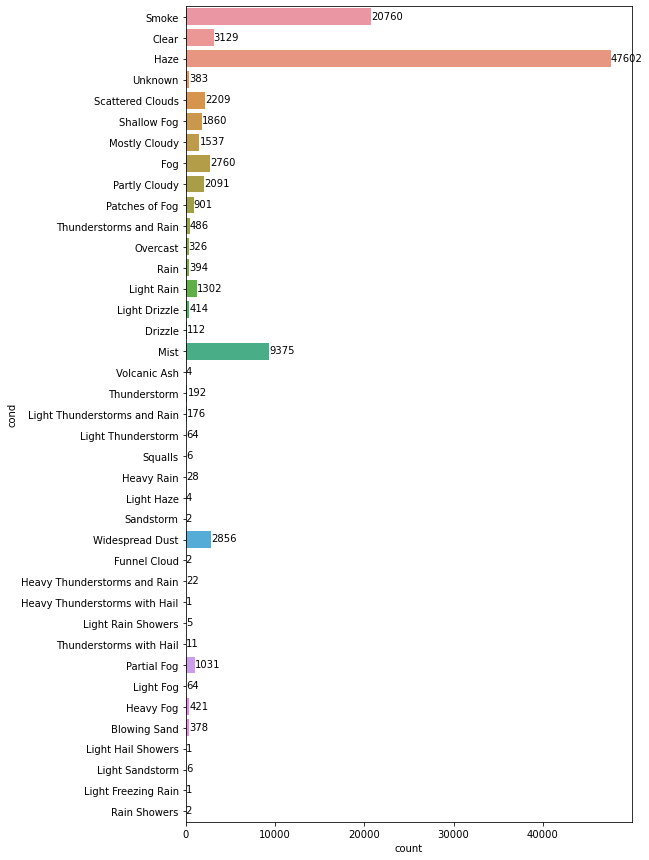

In [8]:
plt.figure(figsize=(8, 15))
f = sns.countplot(y = 'cond', data = df)
for i in f.patches:
        x = i.get_x() + i.get_width()
        y = i.get_y() + 0.5
        plt.annotate(i.get_width(), (x, y))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   datetime       100990 non-null  object 
 1   cond           100918 non-null  object 
 2   dew            100369 non-null  float64
 3   fog            100990 non-null  int64  
 4   hail           100990 non-null  int64  
 5   heatIndex      29155 non-null   float64
 6   humidity       100233 non-null  float64
 7   precipitation  0 non-null       float64
 8   pressure       100758 non-null  float64
 9   rain           100990 non-null  int64  
 10  snow           100990 non-null  int64  
 11  temp           100317 non-null  float64
 12  thunder        100990 non-null  int64  
 13  tornado        100990 non-null  int64  
 14  vis            96562 non-null   float64
 15  windFlow       86235 non-null   float64
 16  windDirection  86235 non-null   object 
 17  wgust          1072 non-null 

In [10]:
df = df.astype({"datetime": 'datetime64[ns]'})

In [11]:
df['date'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['time'] = df['datetime'].dt.hour

In [12]:
del df['datetime']

In [13]:
df.head()

,cond,dew,fog,hail,heatIndex,humidity,precipitation,pressure,rain,snow,...,vis,windFlow,windDirection,wgust,windChill,windSpeed,date,month,year,time
0,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,...,5.0,280.0,West,NaN,NaN,7.4,1,11,1996,11
1,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,...,NaN,0.0,North,NaN,NaN,NaN,1,11,1996,12
2,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,...,NaN,0.0,North,NaN,NaN,NaN,1,11,1996,13
3,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,...,2.0,0.0,North,NaN,NaN,NaN,1,11,1996,14
4,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,...,1.2,0.0,North,NaN,NaN,0.0,1,11,1996,16


In [14]:
round(df.isnull().sum()/len(df)*100, 2)

cond               0.07
dew                0.61
fog                0.00
hail               0.00
heatIndex         71.13
humidity           0.75
precipitation    100.00
pressure           0.23
rain               0.00
snow               0.00
temp               0.67
thunder            0.00
tornado            0.00
vis                4.38
windFlow          14.61
windDirection     14.61
wgust             98.94
windChill         99.43
windSpeed          2.33
date               0.00
month              0.00
year               0.00
time               0.00
dtype: float64

# Data Cleaning

Delete 'heatIndex', 'precipitation', 'wgust', and 'windChill' since more than 70% of the values are missing

In [15]:
df.drop(['heatIndex', 'precipitation', 'wgust', 'windChill'], axis = 1, inplace = True)

Drop the missing value rows in 'cond', since it is the label  
Also drop missing value rows in 'dew', 'humidity', 'pressure', 'temp', 'vis', and 'windSpeed' since they have only 0-5% missing data

In [16]:
index0 = list(np.where(df['cond'].isnull() | df['dew'].isnull() | df['humidity'].isnull() | df['pressure'].isnull() | df['temp'].isnull() | df['vis'].isnull() | df['windSpeed'].isnull()))
print(len(index0[0])/len(df))
df = df.drop(index0[0], axis = 0).reset_index()

0.05407466085751064


We are dropping 5.4% of the data, so there is not much loss of data

In [17]:
del df['index']

In [18]:
df.isnull().sum()

cond                 0
dew                  0
fog                  0
hail                 0
humidity             0
pressure             0
rain                 0
snow                 0
temp                 0
thunder              0
tornado              0
vis                  0
windFlow         14638
windDirection    14638
windSpeed            0
date                 0
month                0
year                 0
time                 0
dtype: int64

Now for treating missing values in 'windDirection' and 'windSpeed', let's see their relations with other features

In [19]:
df = df.astype({"cond": 'category'})
df['cond'] = df[['cond']].apply(lambda x: x.cat.codes)

## Analyzing Categorical Data

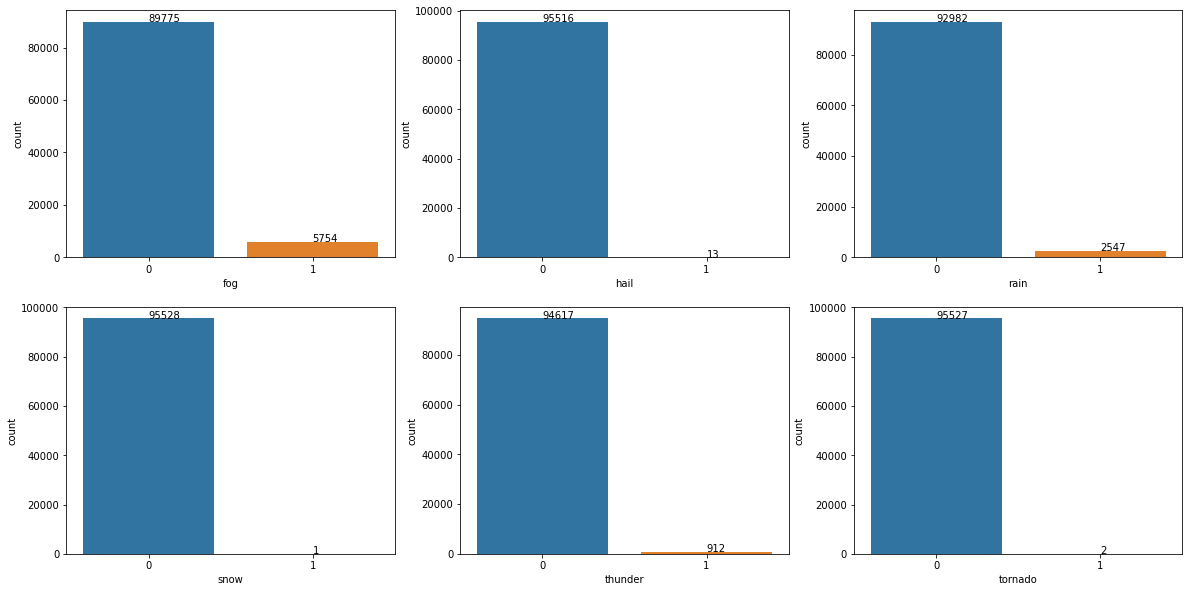

In [20]:
plt.figure(figsize = (20, 10))
for i, col in enumerate(['fog', 'hail', 'rain', 'snow', 'thunder', 'tornado']):
    plt.subplot(2, 3, i+1)
    f = sns.countplot(x = col, data = df)
    for i in f.patches:
        x = i.get_x() + i.get_width()/2
        y = i.get_height()
        plt.annotate(i.get_height(), (x, y))

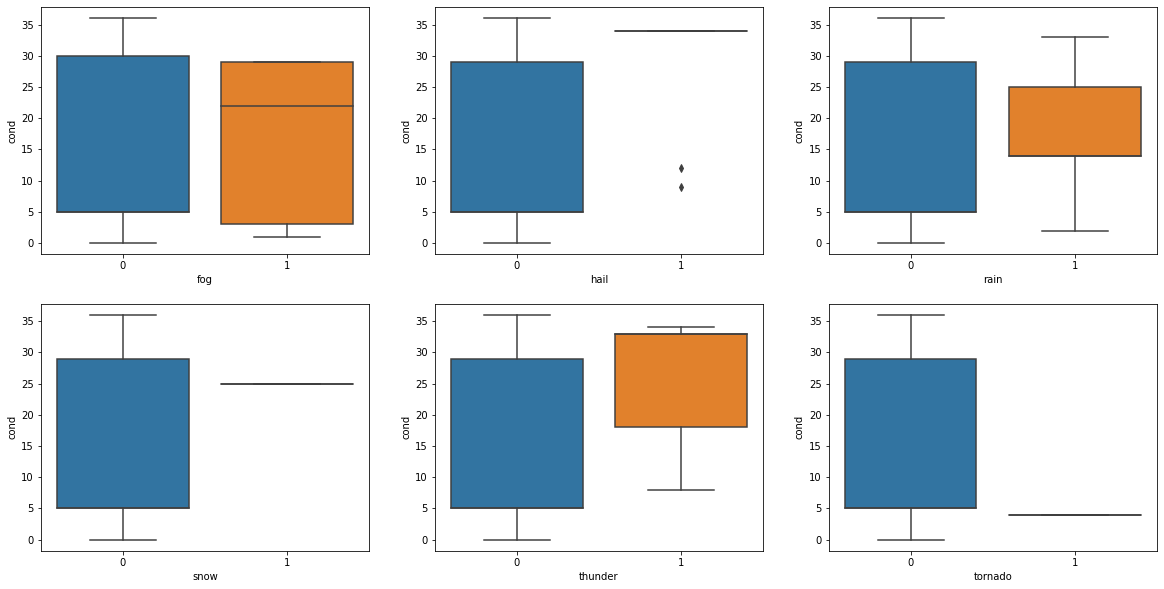

In [21]:
plt.figure(figsize = (20, 10))
for i, col in enumerate(['fog', 'hail', 'rain', 'snow', 'thunder', 'tornado']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x = df[col], y = df['cond'])

## Analyzing Numerical Data

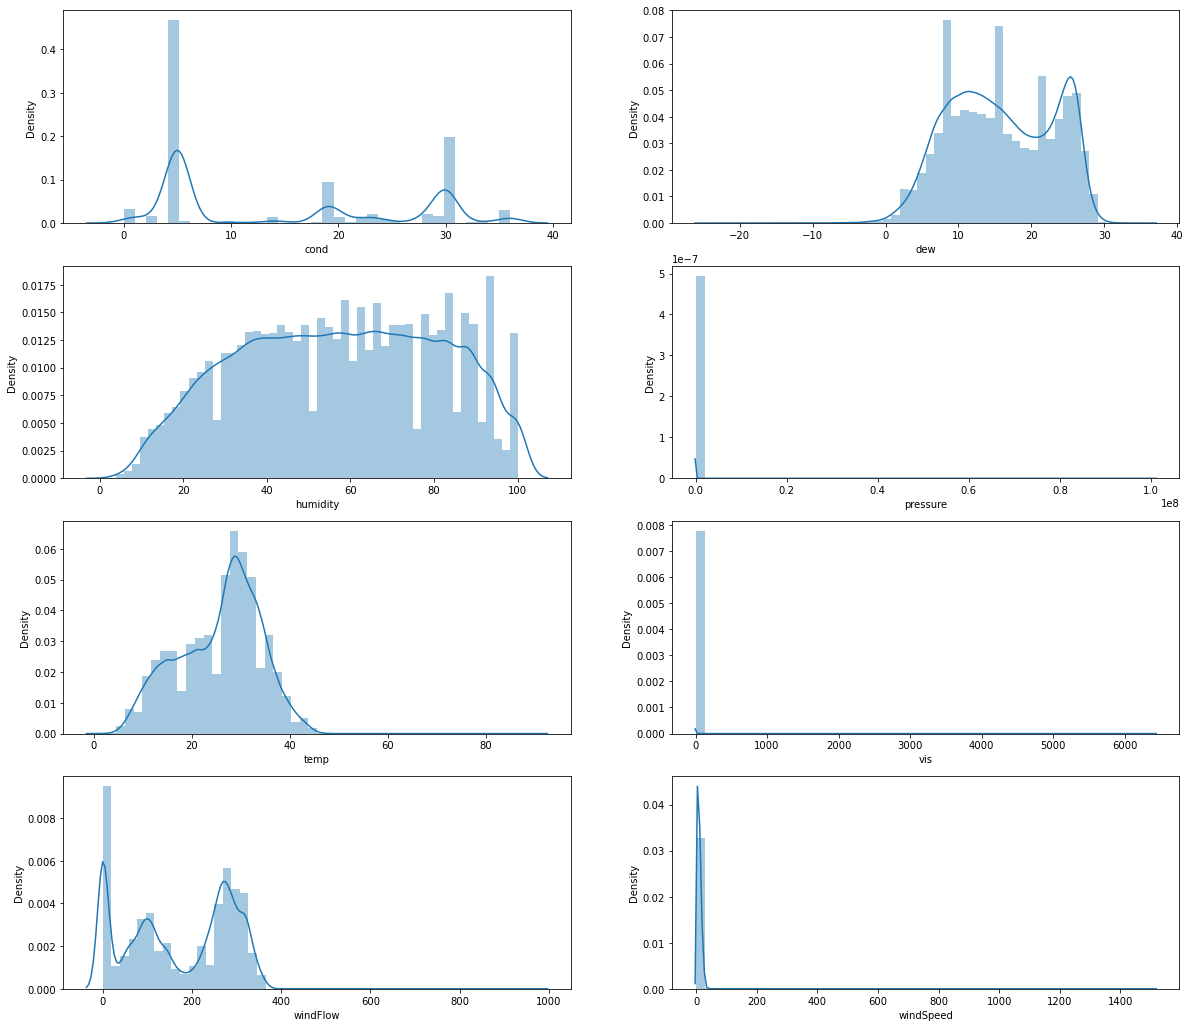

In [22]:
plt.figure(figsize = (20, 18))
for i, col in enumerate(['cond', 'dew', 'humidity', 'pressure', 'temp', 'vis', 'windFlow', 'windSpeed']):
    plt.subplot(4, 2, i+1)
    sns.distplot(x = df[col])
    plt.xlabel(col)

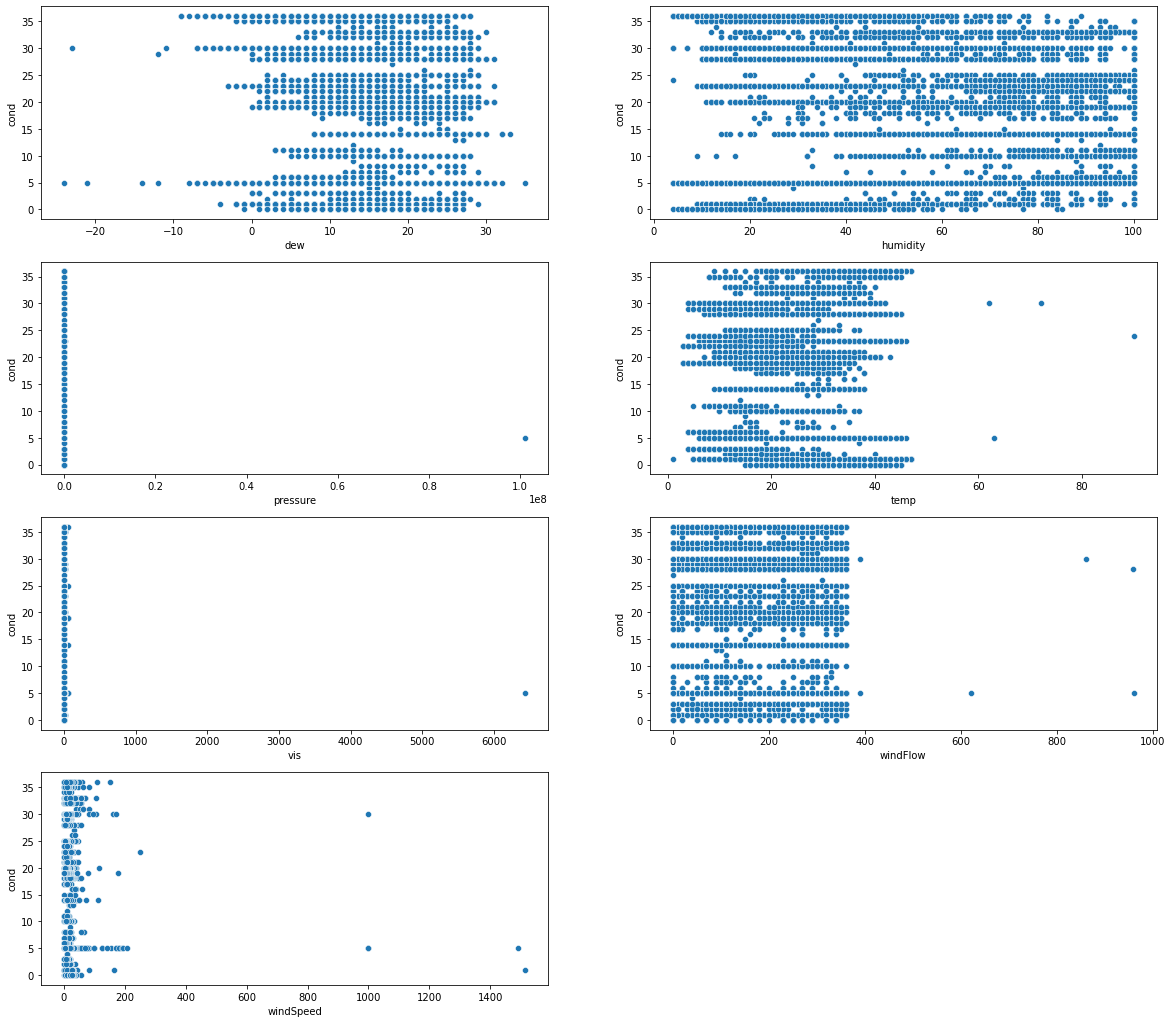

In [23]:
plt.figure(figsize = (20, 18))
for i, col in enumerate(['dew', 'humidity', 'pressure', 'temp', 'vis', 'windFlow', 'windSpeed']):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(x = df[col], y = df['cond'])
    plt.xlabel(col)

delete dew < -10, pressure > 50000, temp > 50, vis > 6000, windFlow > 380, windSpeed > 100  

In [24]:
df.drop(df[(df['dew'] < -10) | (df['pressure'] >= 50000) | (df['temp'] > 50) | (df['vis'] > 6000) | (df['windFlow'] > 380) | (df['windSpeed'] > 100)].index, inplace = True)

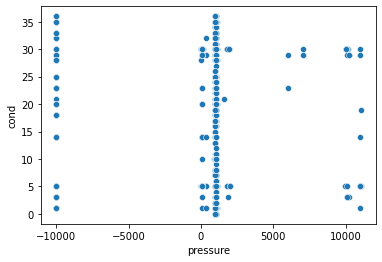

In [25]:
sns.scatterplot(x = df['pressure'], y = df['cond'])

Ideal pressure for air is 1013.25
remove pressure > 1030 and pressure < 985 also

In [26]:
df.drop(df[(df['pressure'] > 1030) | (df['pressure'] < 985)].index, inplace = True)

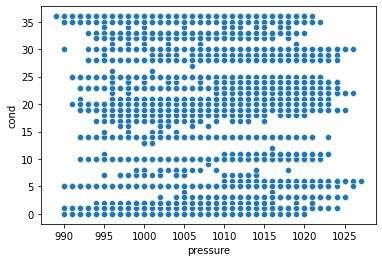

In [27]:
sns.scatterplot(x = df['pressure'], y = df['cond'])

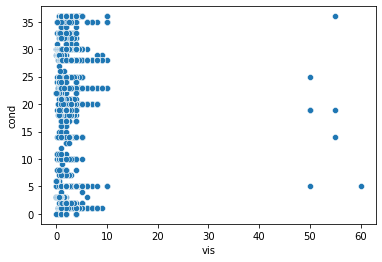

In [28]:
sns.scatterplot(x = df['vis'], y = df['cond'])

In [29]:
df.drop(df[df['vis'] > 15].index, inplace = True)

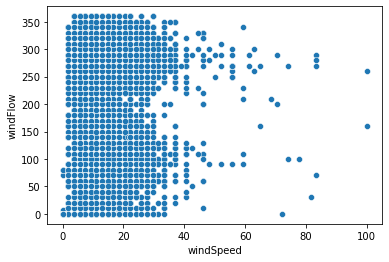

In [30]:
sns.scatterplot(x = df['windSpeed'], y = df['windFlow'])

In [31]:
df.drop(df[df['windSpeed'] > 35].index, inplace = True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94655 entries, 0 to 95528
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cond           94655 non-null  int8   
 1   dew            94655 non-null  float64
 2   fog            94655 non-null  int64  
 3   hail           94655 non-null  int64  
 4   humidity       94655 non-null  float64
 5   pressure       94655 non-null  float64
 6   rain           94655 non-null  int64  
 7   snow           94655 non-null  int64  
 8   temp           94655 non-null  float64
 9   thunder        94655 non-null  int64  
 10  tornado        94655 non-null  int64  
 11  vis            94655 non-null  float64
 12  windFlow       80029 non-null  float64
 13  windDirection  80029 non-null  object 
 14  windSpeed      94655 non-null  float64
 15  date           94655 non-null  int64  
 16  month          94655 non-null  int64  
 17  year           94655 non-null  int64  
 18  time  

In [33]:
df.isnull().sum()

cond                 0
dew                  0
fog                  0
hail                 0
humidity             0
pressure             0
rain                 0
snow                 0
temp                 0
thunder              0
tornado              0
vis                  0
windFlow         14626
windDirection    14626
windSpeed            0
date                 0
month                0
year                 0
time                 0
dtype: int64

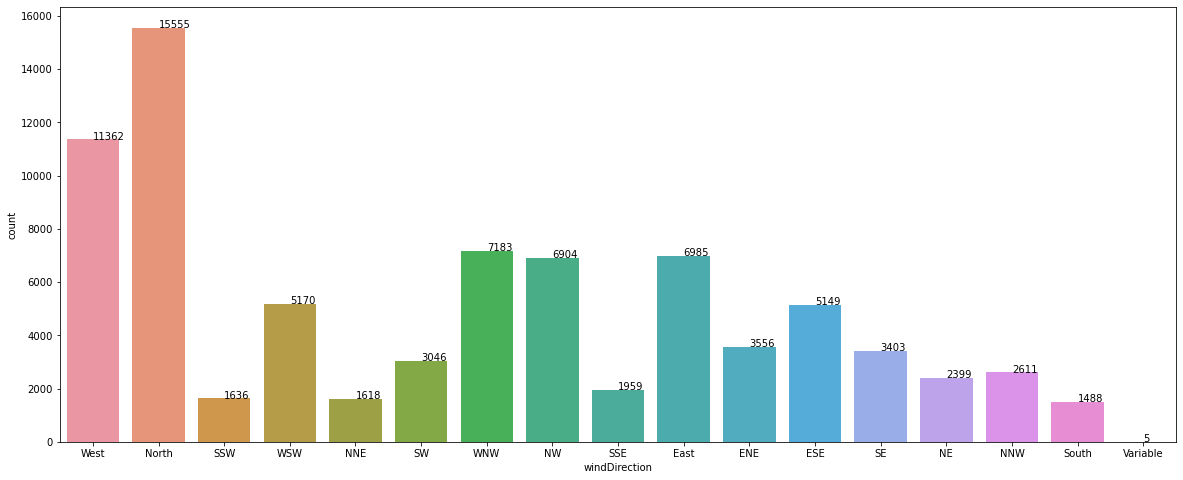

In [34]:
plt.figure(figsize=(20, 8))
f = sns.countplot(x ='windDirection', data=df)
for i in f.patches:
        x = i.get_x() + i.get_width()/2
        y = i.get_height()
        plt.annotate(i.get_height(), (x, y))

Since the number of missing values is very large, therefore create a new category

In [35]:
df[df['windDirection'] == 'Variable']

,cond,dew,fog,hail,humidity,pressure,rain,snow,temp,thunder,tornado,vis,windFlow,windDirection,windSpeed,date,month,year,time
42928,5,26.0,0,0,70.0,1003.0,0,0,32.0,0,0,5.0,0.0,Variable,3.7,11,8,2003,4
75436,5,22.0,0,0,47.0,999.0,0,0,35.0,0,0,3.0,0.0,Variable,5.6,11,6,2011,5
83557,17,26.0,0,0,84.0,1001.0,0,0,29.0,1,0,1.0,0.0,Variable,3.7,10,8,2014,9
90381,5,27.0,0,0,71.0,998.0,0,0,33.0,0,0,3.0,0.0,Variable,1.9,10,7,2016,5
93127,30,15.0,0,0,42.0,1016.0,0,0,29.0,0,0,1.5,0.0,Variable,3.7,14,11,2016,7


In [36]:
df.drop(df[df['windDirection'] == 'Variable'].index, inplace = True)

In [37]:
df['windDirection'].nunique()

16

In [38]:
df['windDirection'].unique()

array(['West', 'North', 'SSW', 'WSW', 'NNE', 'SW', 'WNW', 'NW', 'SSE',
       'East', 'ENE', 'ESE', 'SE', 'NE', 'NNW', 'South', nan],
      dtype=object)

In [39]:
df = df.astype({"windDirection": 'category'})
df['windDirection'] = df[['windDirection']].apply(lambda x: x.cat.codes)

In [40]:
df['windDirection'].nunique()

17

New category is created

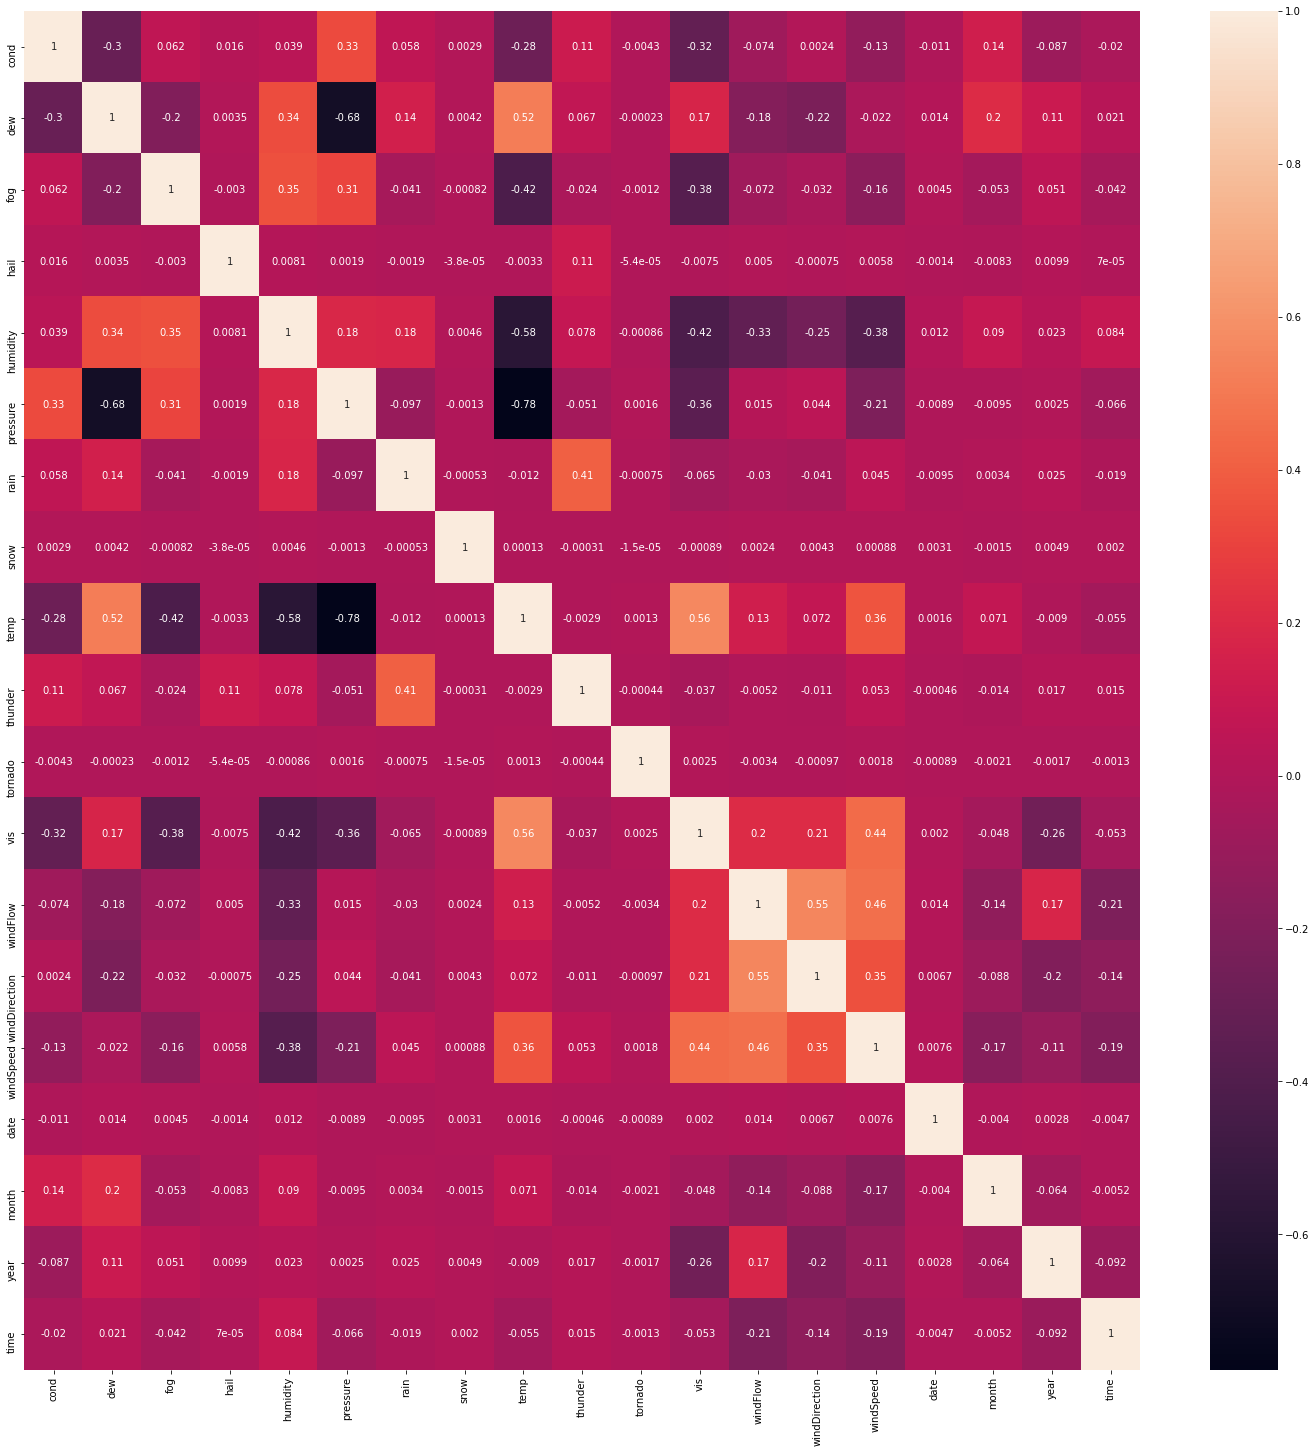

In [41]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot = True)

Followng features are highly correlated:  
    ==> pressure and dew  
    ==> pressure and temp 

Assumption: windFlow is dependent on dew, humidity, temp, vis, windSpeed, month ,year, time  a

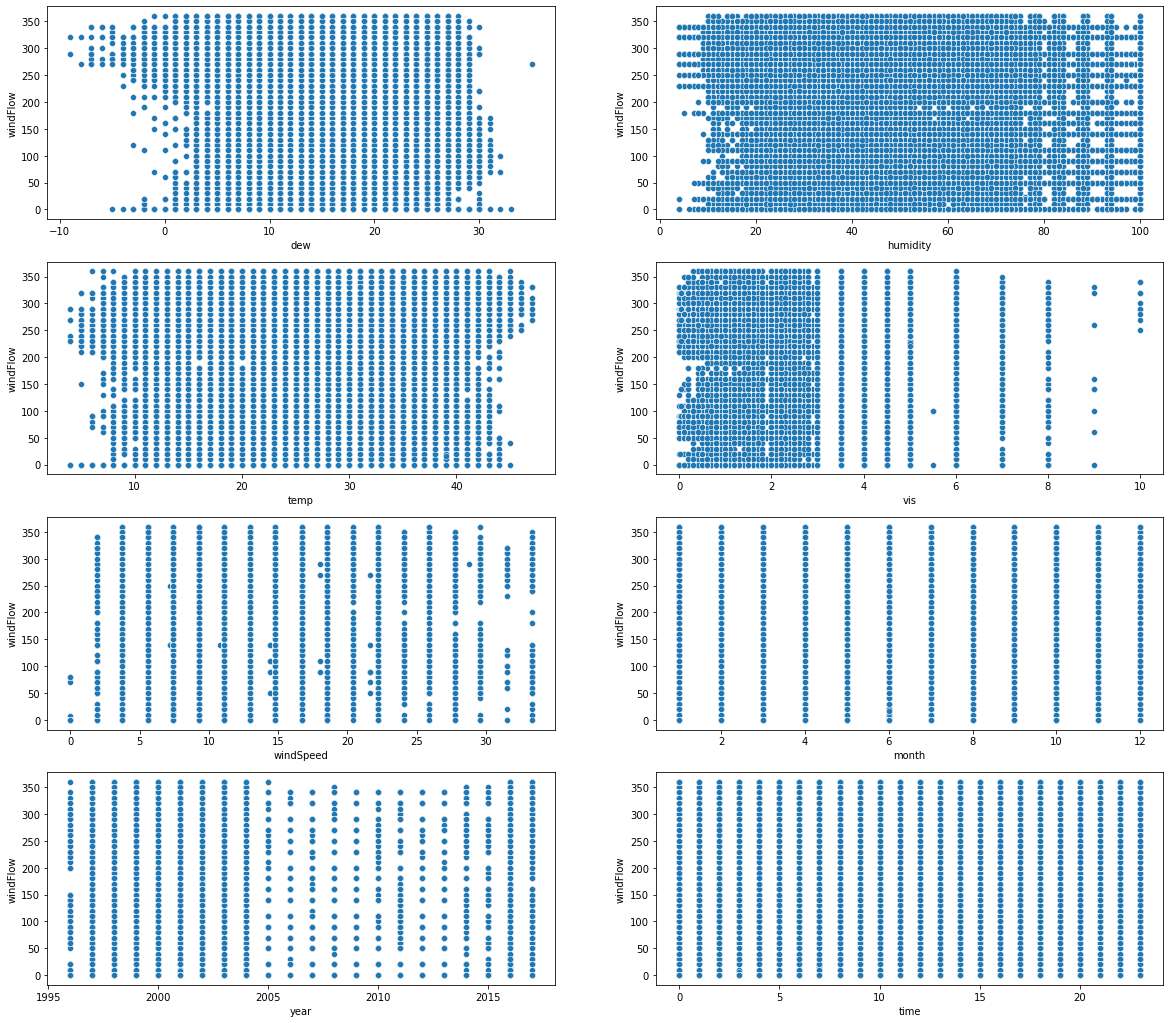

In [42]:
plt.figure(figsize = (20, 18))
for i, col in enumerate(['dew', 'humidity', 'temp', 'vis', 'windSpeed', 'month', 'year', 'time']):
    plt.subplot(4, 2, i+1)
    f = sns.scatterplot(x = df[col], y = df['windFlow'])

No parameter is found on which windFlow is dependent

In [43]:
df['windFlow'] = df['windFlow'].fillna(df['windFlow'].median())

In [44]:
df.isnull().sum()

cond             0
dew              0
fog              0
hail             0
humidity         0
pressure         0
rain             0
snow             0
temp             0
thunder          0
tornado          0
vis              0
windFlow         0
windDirection    0
windSpeed        0
date             0
month            0
year             0
time             0
dtype: int64

In [45]:
x = df.drop(['cond'], axis = 1)
y = df['cond']

In [46]:
x.shape

(94650, 18)

In [47]:
x.columns.nunique()

18

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import cross_val_score, KFold

In [53]:
def model_score(x, y):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .25, random_state = 0)
    model = RandomForestClassifier().fit(xtrain, ytrain)
    print('Testing score: ', model.score(xtest, ytest))
    print('Training score: ', model.score(xtrain, ytrain))
    return model

In [54]:
model = model_score(x, y)

Testing score:  0.8565270675738494
Training score:  0.9998591291363207


In [55]:
def kfold(x, y):
    kfold = KFold(n_splits = 10, random_state = 0, shuffle=True)
    kfold_accuracy = cross_val_score(RandomForestClassifier(), x, y, cv = kfold, scoring = 'accuracy')
    kfold_mean_accuracy = kfold_accuracy.mean()
    std = kfold_accuracy.std()

    print('Kfold Accuracy: ', kfold_mean_accuracy)
    print('std: ', std)

In [56]:
kfold(x, y)

Kfold Accuracy:  0.8622609614368727
std:  0.0027265894924950003


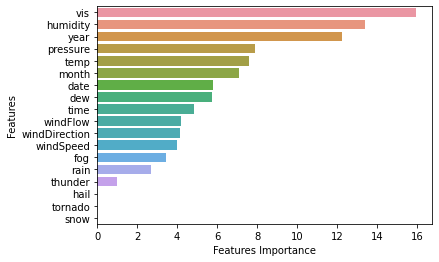

In [57]:
feature_imp = pd.Series(model.feature_importances_*100, index=x.columns).sort_values(ascending=False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Features Importance")
plt.ylabel("Features")
plt.show()

In [58]:
x = df.drop(['cond', 'pressure', 'hail', 'tornado', 'snow'], axis = 1)
y = df['cond']

In [59]:
model = model_score(x, y)

Testing score:  0.8516671597007988
Training score:  0.9998732162226887


In [60]:
kfold(x, y)

Kfold Accuracy:  0.8576862123613311
std:  0.0027498055099710278


#### Final Accuracy : 85.1%